<a href="https://colab.research.google.com/github/sim-so/HandsOnML/blob/main/06_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06 Decision Tree

In [48]:
import os

import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [8]:
base_path = "/content"

## 1. 결정 트리 학습과 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [5]:
iris = load_iris()
print(iris.feature_names)
X = iris.data[:, 2:]        # petal length (cm), petal width (cm)
y = iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [11]:
from sklearn.tree import export_graphviz

image_path = os.path.join(base_path, "iris_tree.dot")

export_graphviz(
    tree_clf,
    out_file=image_path,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

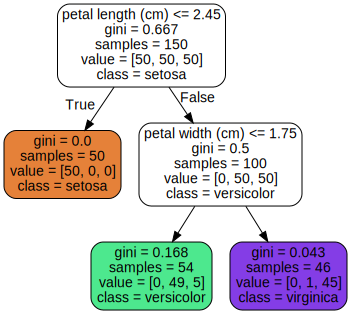

In [12]:
from graphviz import Source

Source.from_file(image_path)

## 2. 예측하기

In [29]:
from matplotlib.colors import ListedColormap


# Visualize decision boundary
def plot_decision_boundary(clf, X, y, axis=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1, x2 = np.meshgrid(
        np.linspace(axis[0], axis[1], 100),
        np.linspace(axis[2], axis[3], 100)
    )
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris sesota")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris verginica")
        plt.axis(axis)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

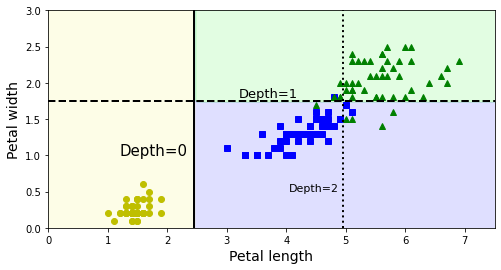

In [21]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.axvline(2.45, c="k", ls="-", lw=2)
plt.axhline(1.75, c="k", ls="--", lw=2)
plt.axvline(4.95, 0, 1.75/3, c="k", ls=":", lw=2)
plt.axvline(4.95, 1.75/3, 1, c="k", ls=":", lw=2)
plt.text(1.20, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)
plt.show()

## 3. 클래스 확률 추정

In [13]:
tree_clf.predict_proba([[5, 1.15]])

array([[0.        , 0.90740741, 0.09259259]])

In [14]:
tree_clf.predict([[5, 1.5]])

array([1])

## 7. 규제 매개변수
Decision Tree 모델은 훈련 과정에서 파라미터 수가 결정되는 비모수 모델(Nonparametric model)입니다. scikit-learn의 CART 훈련 알고리즘은 확률적이기 때문에, 같은 모델을 훈련하여도 매번 다른 모델이 만들어집니다.\
모수 모델(Parametric model)에 비하면 과대적합될 위험이 상대적으로 높기 때문에, 학습 시 자유도를 제한할 필요가 있습니다.

In [25]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

규제가 없을 시에는 샘플을 가능한 모두 분류하기 위해 제한 없이 잎 노드를 생성하므로, 과대적합이 되기 쉽습니다.\
min_sample_leaf=4로 잎 노드에 최소한 4개의 샘플을 포함하도록 했을 때 상대적으로 일반화가 잘 된 것을 확인할 수 있습니다.

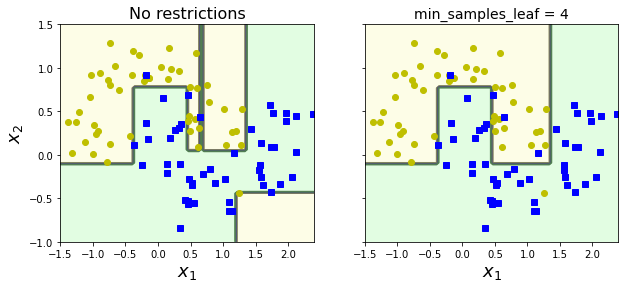

In [30]:
axis = [-1.5, 2.4, -1, 1.5]

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axis=axis, iris=False)
plt.title("No restrictions", fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axis=axis, iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

## 8. 회귀

DART는 회귀에도 사용할 수 있습니다.\
간단한 데이터셋을 만들어 회귀 문제에 적용합니다.

In [61]:
np.random.seed(27)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=27)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=27)

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=27, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=27, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=27)

In [64]:
def plot_regression_predictions(tree_reg, X, y, axis=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axis[0], axis[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axis)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

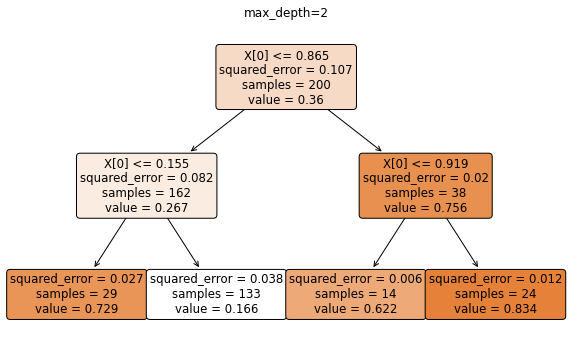

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 6))
plot_tree(tree_reg1, filled=True, rounded=True)
plt.title("max_depth=2")
plt.show()

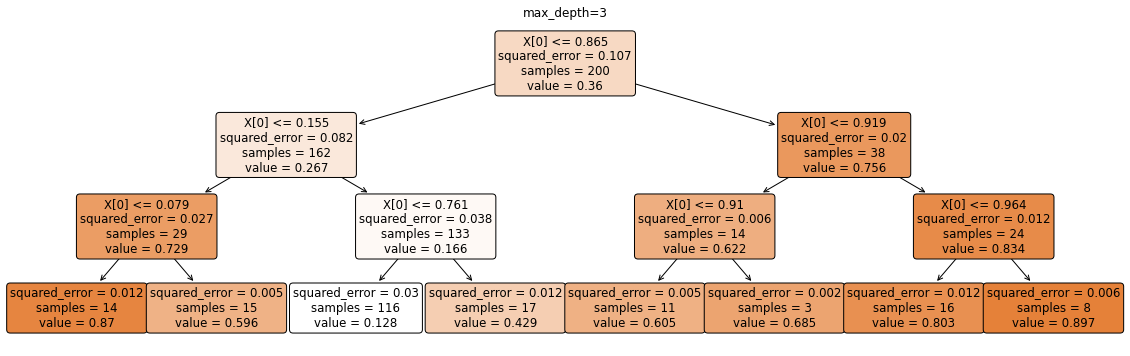

In [66]:
plt.figure(figsize=(20, 6))
plot_tree(tree_reg2, filled=True, rounded=True)
plt.title("max_depth=3")
plt.show()

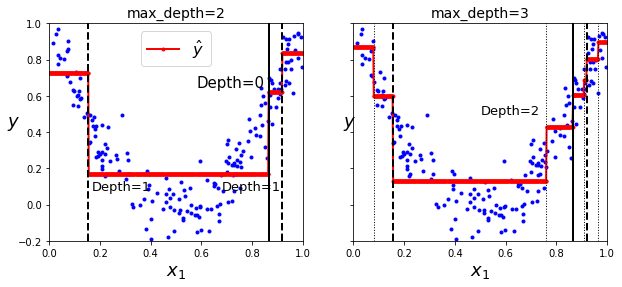

In [74]:
splits = ((0.865, "k-"), (0.155, "k--"), (0.919, "k--"))

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in splits:
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.58, 0.65, "Depth=0", fontsize=15)
plt.text(0.17, 0.08, "Depth=1", fontsize=13)
plt.text(0.68, 0.08, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y)
for split, style in splits:
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.079, 0.761, 0.91, 0.964):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.5, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

## 9. 불안정성
결정 트리는 분류와 회귀에 모두 사용이 가능하고, 해석이 쉬우며, 사용이 편리하다는 장점을 가지고 있습니다.\
그러나 결정 트리는 계단 모양의 결정 경계를 갖기 때문에, 훈련 데이터의 회전에 매우 민감하고 훈련 데이터의 작은 변화에도 매우 민감하게 반응합니다.


다음은 훈련 세트의 회전에 따른 결정 경계 차이를 보여주는 코드입니다.\
훈련 세트를 회전 시킨 모델(오른쪽)의 경우, 일반화가 되기 어려움을 알 수 있습니다.

In [ ]:
np.random.seed(27)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

In [ ]:
tree_clf_s = DecisionTreeClassifier(random_state=27)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=27)
tree_clf_sr.fit(Xsr, ys)

DecisionTreeClassifier(random_state=27)

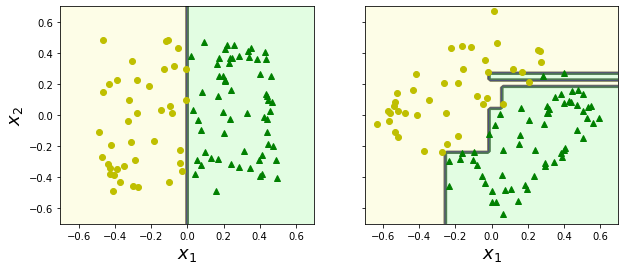

In [ ]:
axis = [-0.7, 0.7, -0.7, 0.7]
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axis=axis, iris=False)

plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axis=axis, iris=False)
plt.ylabel("")

plt.show()

다음은 iris 데이터를 회전시킨 뒤 훈련한 Decision tree의 결정 경계입니다.\
마찬가지로 전혀 다른 결정 경계를 만들게 됩니다.

In [75]:
X = iris.data[:, 2:]        # petal length (cm), petal width (cm)
y = iris.target

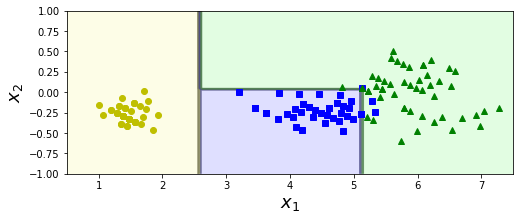

In [ ]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axis=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

또한, 훈련 데이터의 변화에 매우 민감하므로 random_state에 따라 모델 훈련 결과가 달라질 수 있습니다.

In [ ]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

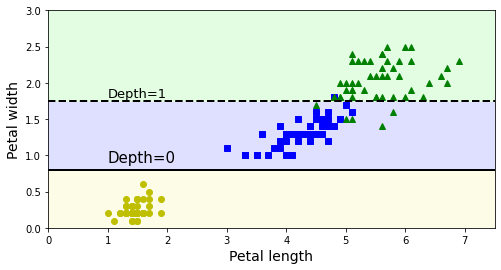

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.axhline(0.8, c="k", ls="-", lw=2)
plt.axhline(1.75, c="k", ls="--", lw=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()